# **Scikit-Learn Coding Challenge #3: Data Preprocessing Techniques**  
**Topic:** Handling Missing Values, Feature Scaling, and Encoding Categorical Data  

---

### **Problem Description**  
In this challenge, you will **preprocess a dataset** to prepare it for machine learning. The preprocessing steps include:  

1. **Handling Missing Values:**  
   - Introduce missing values to a dataset artificially.  
   - Handle missing values using **imputation techniques**:
     - **Mean, Median, Mode imputation** for numerical data.  
     - **Simple Imputer** and **KNN Imputer** methods.  

2. **Feature Scaling & Normalization:**  
   - Apply **StandardScaler**, **MinMaxScaler**, and **RobustScaler** to numerical features.  
   - Visualize the impact of each scaling technique using histograms.  

3. **Encoding Categorical Data:**  
   - Use **OneHotEncoder** and **LabelEncoder** to encode categorical features.  
   - Demonstrate encoding on a **synthetic dataset** with categorical columns.  

---

### **Constraints**  
✅ Use the **Wine dataset** (`load_wine()`) from Scikit-learn.  
✅ Introduce **missing values randomly** to at least **10%** of the data.  
✅ Implement **three different imputation techniques**.  
✅ Apply **three different scaling techniques** to **numerical data**.  
✅ Encode a **categorical feature** using **both OneHotEncoder and LabelEncoder**.  
✅ Visualize the impact of preprocessing using **plots**.  

---

### **Example Input & Output**  
**Example: Handling Missing Values with Mean Imputation**  
```plaintext
Before Imputation (missing values):
   alcohol  malic_acid   ash
0     13.0         2.0    NaN
1     12.4         NaN    2.3
2      NaN         1.6    2.1

After Imputation (mean strategy):
   alcohol  malic_acid   ash
0     13.0         2.0    2.4
1     12.4         2.0    2.3
2     13.0         1.6    2.1
```

**Example: Categorical Encoding**  
```plaintext
Original Categorical Data:
   color
0   red
1   green
2   blue

Label Encoding:
   color
0      2
1      1
2      0

OneHot Encoding:
   color_blue  color_green  color_red
0           0            0          1
1           0            1          0
2           1            0          0
```

---

### **Hints**  
- Use **`np.random.choice()`** to introduce **NaN values** into the dataset.  
- **Imputation techniques**:
  - **SimpleImputer**: `strategy='mean'`, `'median'`, or `'most_frequent'`.  
  - **KNNImputer**: Fills missing values using the **k-nearest neighbors**.  

- **Scaling techniques**:
  - **StandardScaler**: Mean **0**, variance **1**.  
  - **MinMaxScaler**: Scales features to a **0-1 range**.  
  - **RobustScaler**: Uses **interquartile range** for scaling (resistant to outliers).  

- **Encoding categorical data**:
  - **LabelEncoder**: Transforms labels into **integers**.  
  - **OneHotEncoder**: Transforms categories into **binary columns**.  

---

### **Bonus Challenge** 🎯  
1. **Combine preprocessing steps into a Scikit-learn pipeline.**  
2. **Handle a dataset with mixed data types** (numerical + categorical).  
3. **Visualize the effect of different imputation strategies** on model performance.  

---

# Solution

### **Data Preprocessing Techniques (Handling Missing Values, Feature Scaling, and Encoding Categorical Data)**  

This solution follows a structured **data preprocessing pipeline** that includes:  
- **Handling missing values** using multiple imputation techniques.  
- **Feature scaling** using StandardScaler, MinMaxScaler, and RobustScaler.  
- **Encoding categorical data** using LabelEncoder and OneHotEncoder.  

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder

In [2]:
# Load the Wine dataset
wine = datasets.load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# Introduce missing values artificially (randomly setting 10% of the data to NaN)
np.random.seed(42)  # For reproducibility
missing_mask = np.random.rand(*df.shape) < 0.1  # 10% missing values
df_missing = df.mask(missing_mask)

# Display dataset with missing values
print("Dataset with Missing Values:")
df_missing.head()

Dataset with Missing Values:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,NaN,0.28,2.29,5.64,NaN,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,NaN,101.0,2.80,NaN,0.30,2.81,5.68,1.03,NaN,1185.0
3,14.37,1.95,2.50,NaN,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,NaN,2.80,NaN,0.39,1.82,4.32,1.04,2.93,735.0


#### **1. Handling Missing Values**
- **Randomly introduced missing values** in **10% of the dataset** using `np.random.rand()`.
- **Three Imputation Methods**:
  - **Mean Imputation** (`SimpleImputer(strategy='mean')`) – replaces missing values with **column means**.
  - **Median Imputation** (`SimpleImputer(strategy='median')`) – replaces missing values with **column medians**.
  - **KNN Imputation** (`KNNImputer(n_neighbors=5)`) – replaces missing values using the **mean of the 5 nearest neighbors**.


In [4]:
# ------------------------- HANDLING MISSING VALUES -------------------------

# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(df_missing), columns=df.columns)

# Display Imputed Data (Mean Strategy)
print("\nAfter Mean Imputation:")
df_mean_imputed.head()


After Mean Imputation:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.60000,127.000000,2.80,2.054,0.28,2.29,5.64,0.955129,3.920000,1065.0
1,13.20,1.78,2.14,11.20000,100.000000,2.65,2.760,0.26,1.28,4.38,1.050000,3.400000,1050.0
2,13.16,2.36,2.67,19.45625,101.000000,2.80,2.054,0.30,2.81,5.68,1.030000,2.576855,1185.0
3,14.37,1.95,2.50,19.45625,113.000000,3.85,3.490,0.24,2.18,7.80,0.860000,3.450000,1480.0
4,13.24,2.59,2.87,21.00000,99.447853,2.80,2.054,0.39,1.82,4.32,1.040000,2.930000,735.0


In [5]:
# Median Imputation
median_imputer = SimpleImputer(strategy='median')
df_median_imputed = pd.DataFrame(median_imputer.fit_transform(df_missing), columns=df.columns)

# Display Imputed Data (Median Strategy)
print("\nAfter Median Imputation:")
df_median_imputed.head()


After Median Imputation:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.60,127.0,2.80,2.17,0.28,2.29,5.64,0.96,3.92,1065.0
1,13.20,1.78,2.14,11.20,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,19.45,101.0,2.80,2.17,0.30,2.81,5.68,1.03,2.77,1185.0
3,14.37,1.95,2.50,19.45,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.00,98.0,2.80,2.17,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_missing), columns=df.columns)

# Display Imputed Data (Mean Strategy)
print("\nAfter KNN Imputation:")
df_knn_imputed.head()


After KNN Imputation:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.60,127.0,2.80,2.828,0.28,2.29,5.64,1.062,3.920,1065.0
1,13.20,1.78,2.14,11.20,100.0,2.65,2.760,0.26,1.28,4.38,1.050,3.400,1050.0
2,13.16,2.36,2.67,20.62,101.0,2.80,2.466,0.30,2.81,5.68,1.030,3.242,1185.0
3,14.37,1.95,2.50,18.16,113.0,3.85,3.490,0.24,2.18,7.80,0.860,3.450,1480.0
4,13.24,2.59,2.87,21.00,96.6,2.80,1.878,0.39,1.82,4.32,1.040,2.930,735.0


---
## **📌 Comparison Table: When to Use Each Imputer**
| **Imputer**  | **Best Used When...** | **Strengths** | **Weaknesses** |
|-------------|---------------------|--------------|-------------|
| **Mean Imputer** (`strategy='mean'`) | Data has a **normal (Gaussian) distribution**. | Fast, simple, and widely used. | Affected by **outliers** (mean shifts if extreme values exist). |
| **Median Imputer** (`strategy='median'`) | Data contains **outliers** or is **skewed**. | Not affected by **outliers** (more robust than mean). | Less accurate if data is **normally distributed**. |
| **Most Frequent Imputer** (`strategy='most_frequent'`) | Categorical data or **highly repetitive numerical values**. | Works well for **categorical features**. | Can **bias the dataset** if there are multiple frequent values. |
| **KNN Imputer** (`KNNImputer(n_neighbors=k)`) | Missing values have patterns and can be inferred from similar data points. | Can capture **complex relationships** in data. | **Computationally expensive** (slow for large datasets), sensitive to **incorrect neighbors**. |
| **Iterative Imputer** (`IterativeImputer()`) | Missing values depend on multiple variables (e.g., missing age depends on salary, education). | **Predicts missing values** based on **multiple features** (more sophisticated). | Can overfit and take **longer to compute**. |

### **📌 General Recommendation:**
- If **data is small and has outliers** → Use **Median Imputer**.  
- If **data is large and missingness is random** → Use **Mean Imputer**.  
- If **data has patterns & relationships** → Use **KNN Imputer**.  
- If **missing values depend on multiple factors** → Use **Iterative Imputer**.  

---

#### **2. Feature Scaling**
- **StandardScaler** (`Z-score normalization`): Centers data to **mean=0** and **variance=1**.
- **MinMaxScaler** (`0-1 normalization`): Scales values between **0 and 1**.
- **RobustScaler** (`IQR scaling`): Scales using the **interquartile range**, making it **robust to outliers**.
- **Visualization:** Histograms before and after scaling to compare distributions.

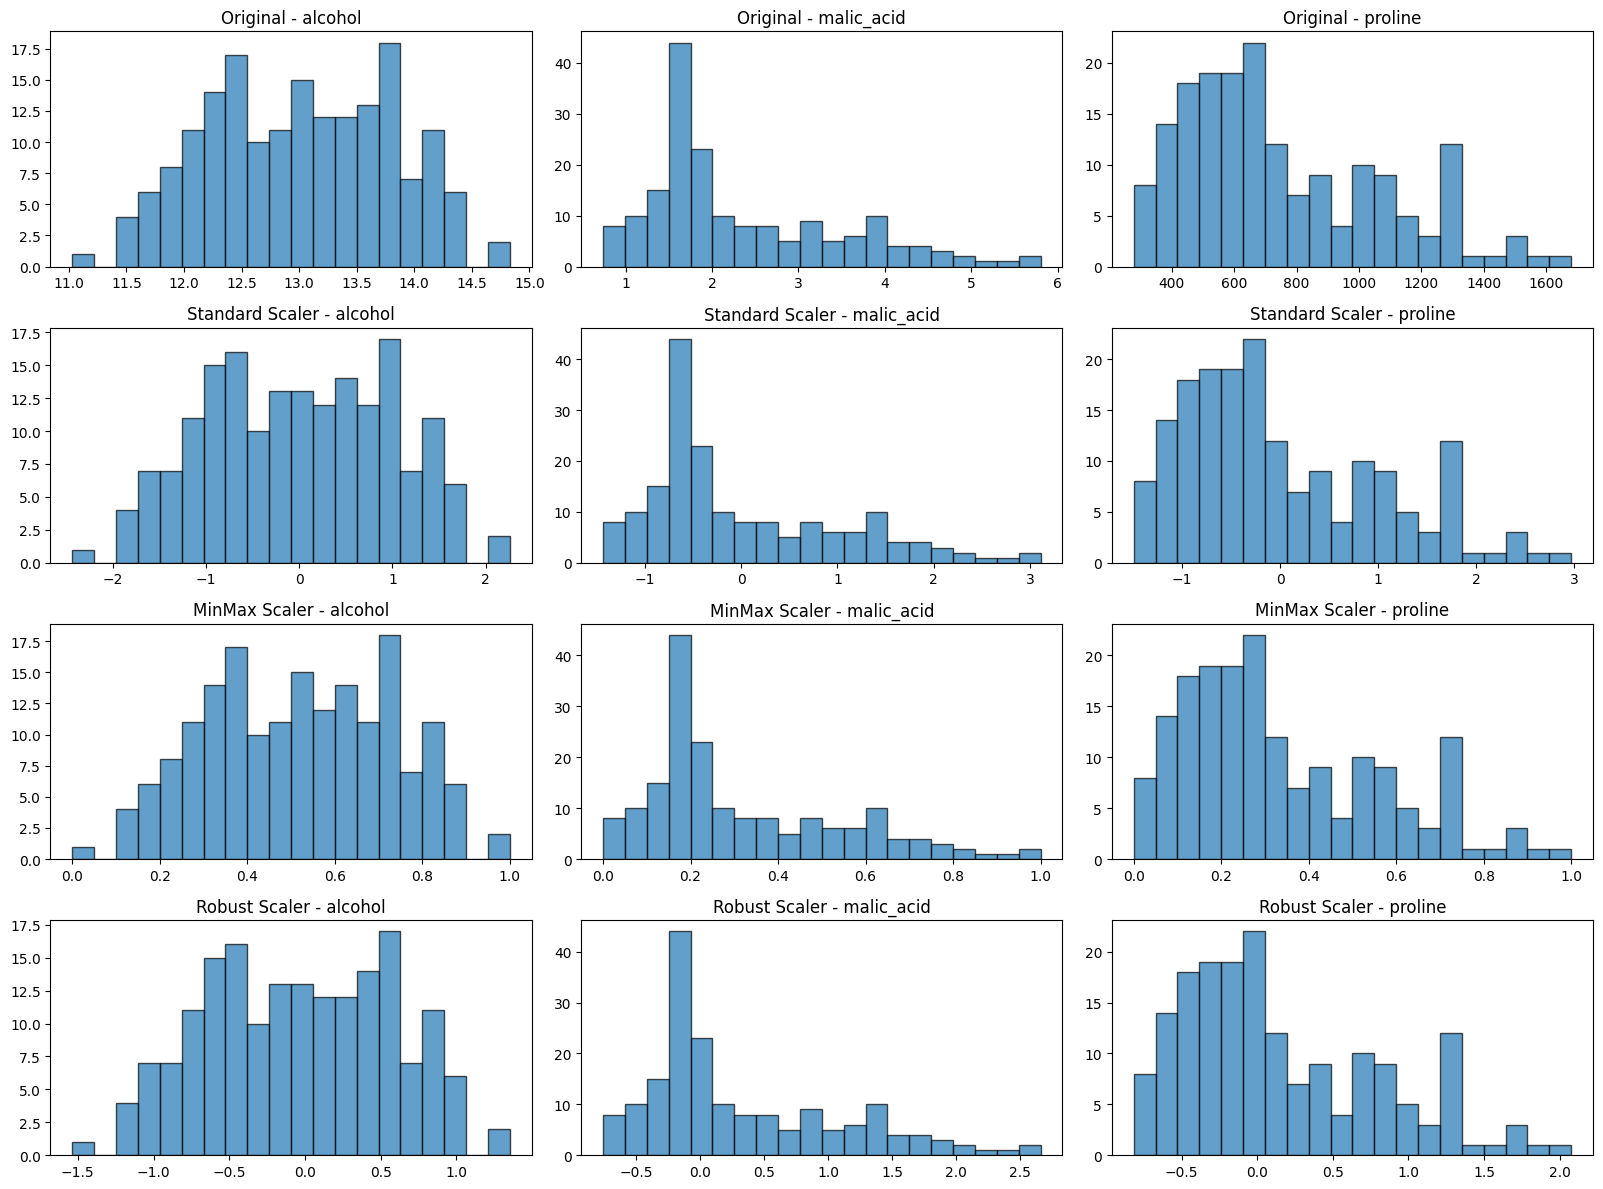

In [7]:
# ------------------------- FEATURE SCALING -------------------------

# Select a few features for visualization
selected_features = ['alcohol', 'malic_acid', 'proline']

# Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df[selected_features]), columns=selected_features)

# Min-Max Scaling (0-1 normalization)
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df[selected_features]), columns=selected_features)

# Robust Scaling (resistant to outliers)
robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df[selected_features]), columns=selected_features)

# Plot histograms before and after scaling
fig, axes = plt.subplots(4, 3, figsize=(16, 12))  # 4 scalers, 3 features
scalers = {'Original': df[selected_features], 
           'Standard Scaler': df_standard_scaled, 
           'MinMax Scaler': df_minmax_scaled, 
           'Robust Scaler': df_robust_scaled}

for row_idx, (scaler_name, scaled_df) in enumerate(scalers.items()): # Iterating Over Different Scalers
    for col_idx, feature in enumerate(selected_features): # Iterating Over Features of Each Scaler (i.e. alcohol, malic_acid, proline)
        ax = axes[row_idx, col_idx]  # Accessing the Correct Subplot: row_idx → Selects which row (corresponding to a specific scaler). col_idx → Selects which column (corresponding to a specific feature).
        ax.hist(scaled_df[feature], bins=20, edgecolor='k', alpha=0.7)
        ax.set_title(f"{scaler_name} - {feature}")

plt.tight_layout()
plt.show()


---
## **📌 Comparison Table: When to Use Each Scaler**
| **Scaler**  | **Best Used When...** | **Strengths** | **Weaknesses** |
|-------------|---------------------|--------------|-------------|
| **StandardScaler** (Z-score normalization) | Data follows a **normal distribution**. | Centers data to **mean=0** and **std=1**. | **Sensitive to outliers** (extreme values distort scaling). |
| **MinMaxScaler** (0-1 normalization) | Data is **not normally distributed** but should be **scaled to a fixed range (0-1)**. | Retains the **original distribution** of data. | Affected by **outliers** (min & max values define range). |
| **RobustScaler** (IQR scaling) | Data contains **many outliers**. | Uses **median & IQR** instead of **mean & variance**, making it **robust to outliers**. | Not as effective if data is already **normally distributed**. |
| **MaxAbsScaler** | Data has **positive & negative values** but should be **scaled by max absolute value**. | Preserves **sparse data structure** (good for **sparse matrices**). | Doesn’t handle **outliers well**. |
| **Log Transformation** | Data is **highly skewed** (e.g., exponential growth). | Reduces **skewness**, making the distribution closer to **normal**. | Only works on **positive values** (cannot handle zero/negative values). |

### **📌 General Recommendation:**
- If **data is normally distributed** → Use **StandardScaler**.  
- If **data is skewed but should be between 0-1** → Use **MinMaxScaler**.  
- If **data has outliers** → Use **RobustScaler**.  
- If **data has exponential growth** → Use **Log Transformation**.  

---

#### **3. Encoding Categorical Data**
- **Label Encoding** (`LabelEncoder`): Converts categorical labels into **numeric codes** (e.g., `red → 2`, `green → 1`, `blue → 0`).
- **One-Hot Encoding** (`OneHotEncoder`): Converts categorical labels into **binary features** (`color_red`, `color_green`, `color_blue`).

In [8]:
# ------------------------- ENCODING CATEGORICAL DATA -------------------------

# Create a synthetic dataset with categorical features
df_categorical = pd.DataFrame({'color': ['red', 'green', 'blue', 'green', 'red', 'blue']})

df_categorical

,color
0,red
1,green
2,blue
3,green
4,red
5,blue


In [9]:
# Label Encoding
label_encoder = LabelEncoder()
df_categorical['color_encoded'] = label_encoder.fit_transform(df_categorical['color'])

# Display Encoded Data
print("\nLabel Encoded Data:")
df_categorical


Label Encoded Data:


,color,color_encoded
0,red,2
1,green,1
2,blue,0
3,green,1
4,red,2
5,blue,0


In [10]:
# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(df_categorical[['color']])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['color']))

onehot_encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [11]:
# Concatenating the One-Hot encoded values with original dataframe
df_categorical_onehot = pd.concat([df_categorical, onehot_encoded_df], axis=1)

# Display Encoded Data
print("\nOne-Hot Encoded Data:")
df_categorical_onehot


One-Hot Encoded Data:


,color,color_encoded,color_blue,color_green,color_red
0,red,2,0.0,0.0,1.0
1,green,1,0.0,1.0,0.0
2,blue,0,1.0,0.0,0.0
3,green,1,0.0,1.0,0.0
4,red,2,0.0,0.0,1.0
5,blue,0,1.0,0.0,0.0


---

### **Time & Space Complexity Analysis**
#### **Time Complexity**
- **Handling Missing Values:** $O(n \times m)$ for imputing missing values.
- **Feature Scaling:** $O(n \times m)$ for applying scalers.
- **Encoding Categorical Data:**
  - **Label Encoding:** $O(n)$ (linear time).
  - **One-Hot Encoding:** $O(n \times k)$, where $k$ is the number of unique categories.

#### **Space Complexity**
- **Imputed Data Storage:** $O(n \times m)$.
- **Scaled Data Storage:** $O(n \times m)$.
- **One-Hot Encoding:** $O(n \times k)$ (can be large if `k` is high).

---

---
## **📌 Comparison Table: When to Use Each Encoder**
| **Encoder** | **Best Used When...** | **Strengths** | **Weaknesses** |
|------------|----------------------|--------------|-------------|
| **LabelEncoder** | A **single categorical feature** with **ordinal values** (e.g., `low < medium < high`). | Fast, easy to apply. | Not good for **non-ordinal data** (introduces false ranking). |
| **OneHotEncoder** | A categorical feature with **no natural order** (e.g., `color: red, blue, green`). | Avoids **false ordering**, makes models more flexible. | Increases **dimensionality** (many unique values = too many new columns). |
| **OrdinalEncoder** | Categories have **a meaningful ranking** (e.g., `grade: A, B, C, D`). | Preserves ordinal relationship. | Assumes **equal spacing**, which may not be true. |
| **Binary Encoder** | High-cardinality categorical features (many unique values). | **Reduces dimensionality** compared to OneHot. | Still increases feature size (but less than OneHot). |
| **Hashing Encoder** | Large datasets with **many unique categories**. | Works well for **big data**. | Can create **collisions** (different categories might get the same hash). |
| **Target Encoding (Mean Encoding)** | When categorical values **have a strong correlation with the target** (e.g., for tree-based models). | Works well for **categorical variables in regression models**. | Can lead to **data leakage** if not handled properly. |

### **📌 General Recommendation:**
- If **data has a natural order** → Use **LabelEncoder** or **OrdinalEncoder**.  
- If **data is non-ordinal** and has **few categories** → Use **OneHotEncoder**.  
- If **data has many unique values (e.g., zip codes, user IDs)** → Use **Binary Encoding or Hashing Encoding**.  
- If **data has categorical variables strongly related to the target** → Use **Target Encoding** (only in regression models).  

---



## **Final Thoughts**
| **Task** | **Best Choice for Normal Data** | **Best Choice for Data with Outliers** | **Best Choice for High Dimensionality** |
|---------|---------------------------------|--------------------------------------|-----------------------------------|
| **Missing Values Imputation** | Mean Imputer | Median or KNN Imputer | Iterative Imputer (for complex dependencies) |
| **Feature Scaling** | StandardScaler | RobustScaler | MinMaxScaler (if range is important) |
| **Categorical Encoding** | LabelEncoder (for ordinal) | OneHotEncoder (for non-ordinal) | Binary Encoder (for high-cardinality) |

---